Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

This homework will require the use of a few datasets in a package written by the TA, Dan. Before beginning, please be sure to download and install the package. Example code for doing this is below:

In [1]:
install.packages('AMSdata_0.1.0.tar.gz', repos = NULL, type="source")

The `election_2016` dataset contains county-level information about the porportion of votes received in the presidential primaries for each candidate in 2016. Begin by subsetting the data to just the information concerning then-candidate Donald Trump. Name this subsetted data set `trump_2016`.

In [15]:
library("AMSdata")
data("election_2016")
trump_2016 <- election_2016[election_2016$candidate =='Donald Trump', ]

Now quickly check to make sure the subset was done correctly before moving on.

In [16]:
stopifnot(round(mean(trump_2016$votes),digits=6) == 3709.576408)

Create a chloropleth map that shows the porportion of registered Republican voters that voted for Trump in each county. The variable from the `trump_2016` data set that you should use is `fraction_votes`. Use the `cut` function to create seven interval groups: 0% - 15%, 15% - 30%, 30% - 45%, 45% - 60%, 60% - 75%, 75% - 90%, and above 90%. This will be necessary when creating the color buckets for plotting. Remember to include all of the necessary plot elements like a title, legend, context information, etc.

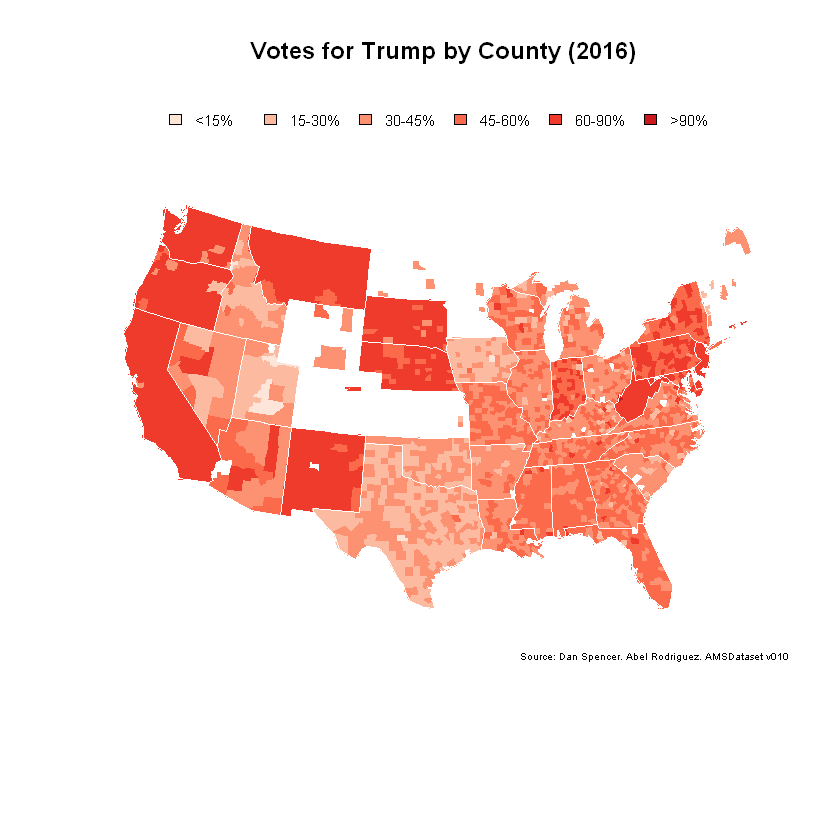

In [300]:
library(RColorBrewer)
library(maps)
data(county.fips)
# Define color buckets 
colors <- brewer.pal(7, "Reds") 
trump_2016$colorBuckets <- as.numeric(cut(trump_2016$fraction_votes, c(0.00, 0.15, 0.30, 0.45, 0.60, 0.90, 1.00))) 
leg.txt <- c("<15%", "15-30%", "30-45%", "45-60%", "60-90%", ">90%") 
# Align data with map definitions by matching FIPS codes 
# Works much better than trying to match the state, county names 
# Which also include multiple polygons for some counties 
colorsmatched <- trump_2016$colorBuckets [match(county.fips$fips, trump_2016$fips)] 
# Draw map 
map("county", col = colors[colorsmatched], fill = TRUE, resolution = 0, lty = 0, projection = "polyconic")
map("state", col = "white", fill = FALSE, add = TRUE, lty = 1, lwd = 0.2, projection="polyconic")
legend("top", leg.txt, cex=0.75, fill = colors, horiz = TRUE, bty="n")
title("Votes for Trump by County (2016)") 
text( par('usr')[ 2 ]*0.60, par('usr')[ 3 ]*1.2, "Source: Dan Spencer. Abel Rodriguez. AMSDataset v010", cex = 0.5)


---

# Problem 2

Next, the `air_qual` data set includes information on the median levels of the pollutant measure PM2.5 at 142 outdoor monitoring stations in California in 2017. Use these data to create an isopleth map of the median PM2.5 levels in 2017. Include all necessary plot elements.

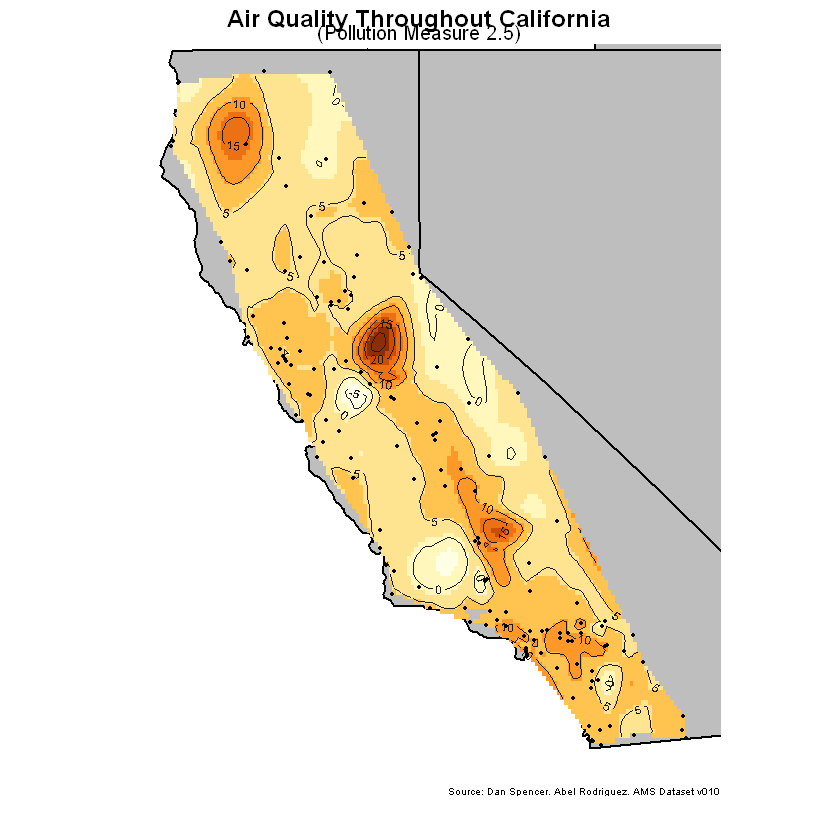

In [304]:
data("air_qual")
colnames(air_qual)[6] <- 'pm_2_5'
colorscale <- brewer.pal(8, "YlOrBr")
map("state", xlim=c(-125,-115), ylim=c(32, 42), lwd=2, fill=T, col="grey", mar=c(1,1,1,1))
title("Air Quality Throughout California\n")
mtext("\n(Pollution Measure 2.5)")
text( par('usr')[ 2 ]*1.020, par('usr')[ 3 ]*1.002, "Source: Dan Spencer. Abel Rodriguez. AMS Dataset v010", cex = 0.5)
air_qual.int <- interp(x=air_qual$SITE_LONGITUDE, y=air_qual$SITE_LATITUDE, z=air_qual$pm_2_5, 
                      xo=seq(min(air_qual$SITE_LONGITUDE), max(air_qual$SITE_LONGITUDE), length = 142), 
                      yo=seq(min(air_qual$SITE_LATITUDE), max(air_qual$SITE_LATITUDE), length = 142), linear = F) 
image(air_qual.int, col=colorscale, axes=F, add=T)
contour(air_qual.int, add=T, col="grey10")
points(air_qual$SITE_LONGITUDE, air_qual$SITE_LATITUDE, cex=0.60, pch=20)

# legend_image <- as.raster(matrix(colorscale, ncol=1))
# plot(c(0,2),c(0,1),type = 'n', axes = F,xlab = '', ylab = '', main = 'Pollutant Measure 2.5')
# text(x=1.5, y = seq(0,1,l=5), labels = seq(0,1,l=5))
# rasterImage(legend_image, 0, 0, 1,1)



---

# Problem 3

The `lesson_8` data set contains mostly-cleaned text data from the lecture 8 slides. Use this information to produce two plots: a word cloud of the most common words used in the lecture, and a bar plot of the 8 most common words. In order to prevent too many words from appearing in the word cloud, set the minimum number of occurrances for each word to be 5. Include plot elements on the bar plot, but exclude the title, labels, and context information on the word cloud, as including it may be confusing.

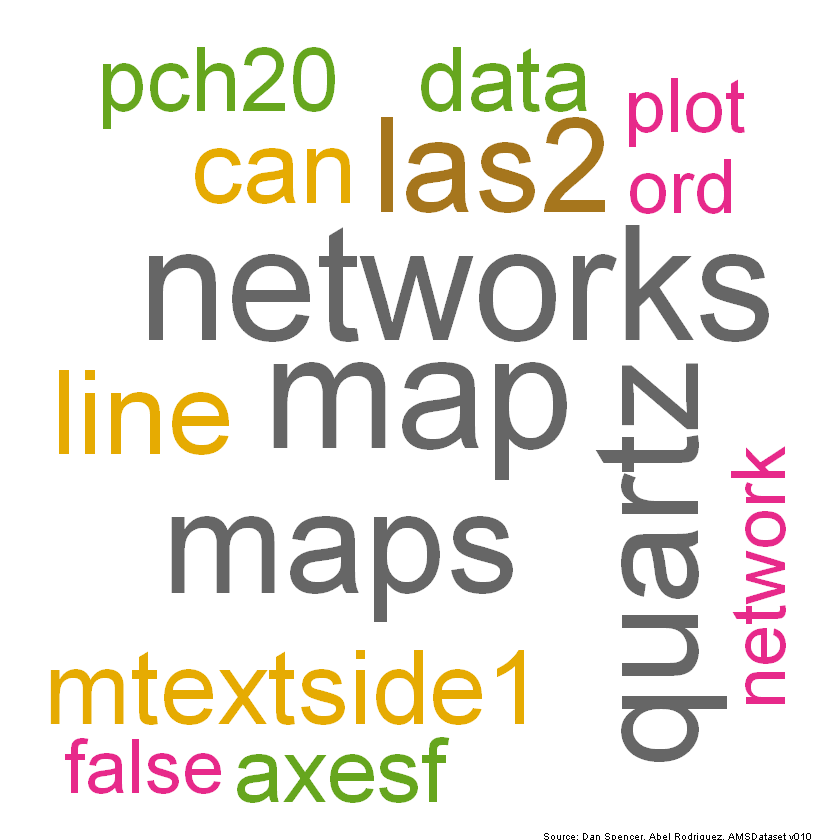

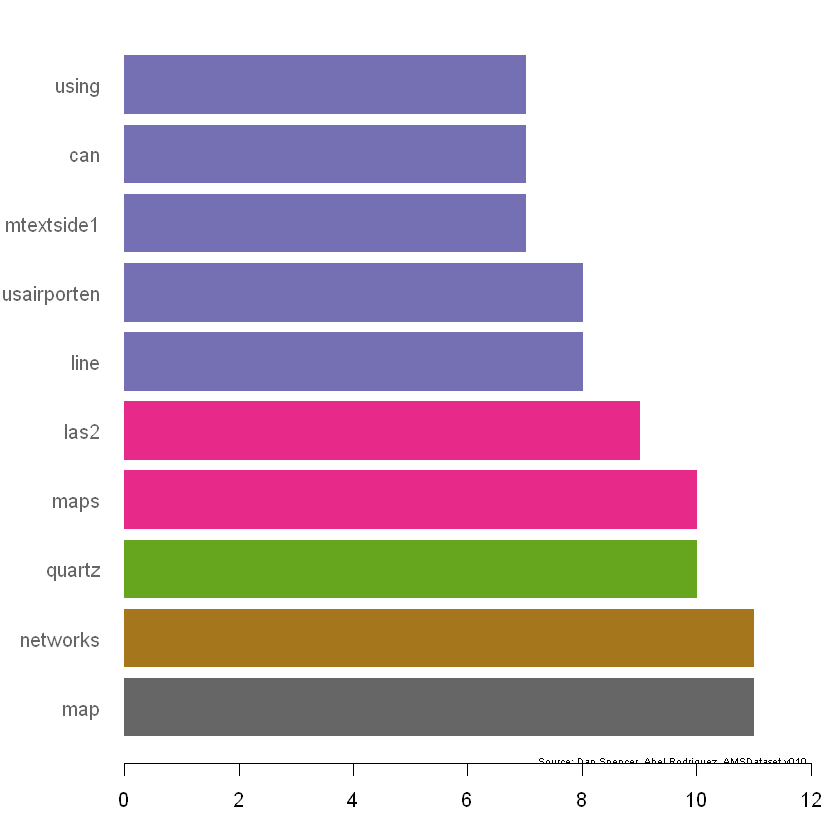

In [327]:
# dependency check and install (https://stackoverflow.com/a/4090208/4154548)
list.of.packages <- c("XML", "tm", "wordcloud")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos <- "http://cran.us.r-project.org")

require(XML)
require(tm)
require(wordcloud)
require(RColorBrewer)
options(warn = -1)

dat1 <- lesson_8
dat2 <- unlist(strsplit(dat1, split<-", "))
dat3 <- grep("dat2", iconv(dat2, "latin1", "ASCII", sub = "dat2"))  # thanks SO user @Ben
dat4 <- dat2[-dat3]

# make corpus
ap.corpus <- Corpus(VectorSource(dat4))
ap.corpus <- tm_map(ap.corpus, removePunctuation)
ap.corpus <- tm_map(ap.corpus, tolower)
ap.corpus <- tm_map(ap.corpus, function(x) removeWords(x, stopwords("english")))
ap.tdm <- TermDocumentMatrix(ap.corpus)
ap.m <- as.matrix(ap.tdm)
ap.v <- sort(rowSums(ap.m),decreasing = TRUE)
ap.d <- data.frame(word = names(ap.v),freq = ap.v)
pal2 <- brewer.pal(8,"Dark2")
wordcloud(ap.d$word,ap.d$freq, scale<-c(8,.2), min.freq = 5, 
          random.order = FALSE, rot.per = .15, colors = pal2)
text( par('usr')[ 2 ]*0.80, par('usr')[ 3 ]*.9, "Source: Dan Spencer. Abel Rodriguez. AMSDataset v010", cex = 0.5)

    
kk  = 10 
ord = order(ap.d$freq, decreasing=T) 
pal2 = brewer.pal(8,"Dark2")
colscale = c(pal2[8], pal2[7], pal2[5], rep(pal2[4],2), rep(pal2[3],5))
par(mar=c(3,5,1,1)+0.2)
barplot(height=round(ap.d$freq[ord[1 :kk]], 4), names.arg=NULL, 
        horiz=T, las=1, xlim=c(0,12), col=colscale, border=colscale) 
mtext(side = 2, line = 1, text = ap.d$word[ord[1:kk]], at = seq(0.7,length=10,by=1.2), las=2, col=colscale[1])
    text( par('usr')[ 2 ]*0.80, par('usr')[ 3 ]*.92, "Source: Dan Spencer. Abel Rodriguez. AMSDataset v010", cex = 0.5)


---

# Problem 4

The `new_quakes` data set includes data on earthquakes that registered over a magnitude of 4.5 between October 23, 2017 and November 23, 2017 all over the world. Use this data frame to make a point process map in which the color of each point describes its magnitude. Be sure to include a title, legend, and context information!

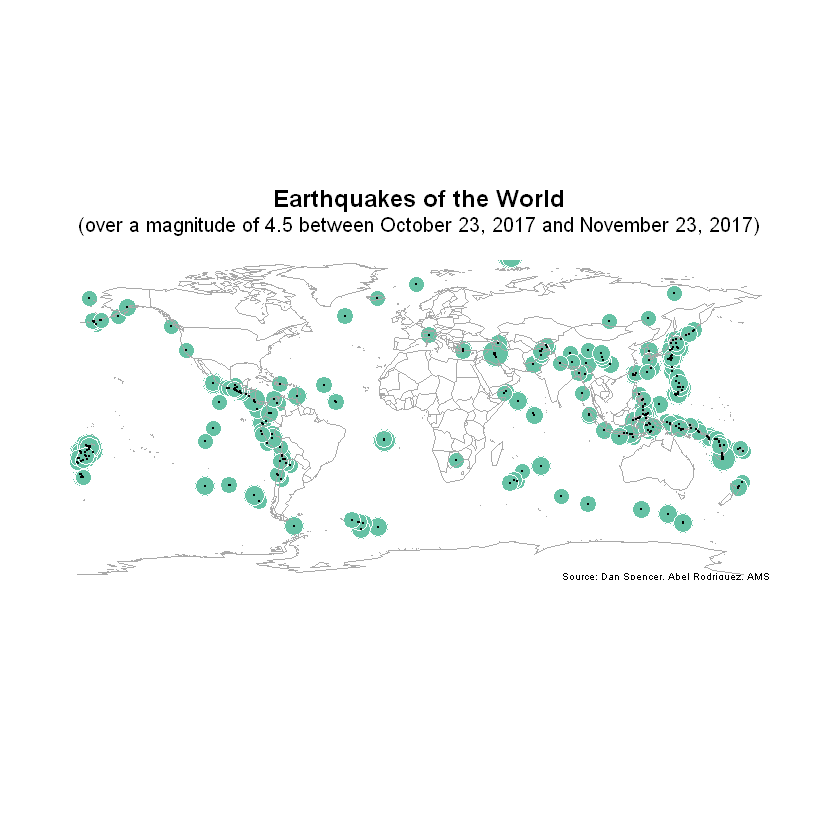

In [333]:
library(AMSdata)
data("new_quakes")

new_quakes <- new_quakes[new_quakes$mag > 4.5,]
colorscale = brewer.pal(8, "Set2") 
map("world", col="darkgrey") 
title("Earthquakes of the World\n")
mtext('(over a magnitude of 4.5 between October 23, 2017 and November 23, 2017)\n')
symbols(new_quakes$longitude, new_quakes$latitude,  circles=new_quakes$mag, inches=F, add=T, fg="white", bg=colorscale[1])
map("world", col="darkgrey", add=T)
points(new_quakes$longitude, new_quakes$latitude,  pch=20, cex=0.3) 
text( par('usr')[ 2 ]*0.80, par('usr')[ 3 ]*.98, "Source: Dan Spencer. Abel Rodriguez. AMSDataset v010", cex = 0.5)
